In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# Step 1: Data Collection
start_date = dt.datetime(2021, 1, 1)
end_date = dt.datetime(2024, 5, 4)
ticker_symbol = 'TSMC34.SA'

In [12]:
# Fetch historical stock price data using Yahoo Finance API
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [13]:
# Step 2: Data Preprocessing
# Assuming data cleaning is done here (handling missing values, etc.)
# Assuming adjusting for stock splits is not necessary for Yahoo Finance data

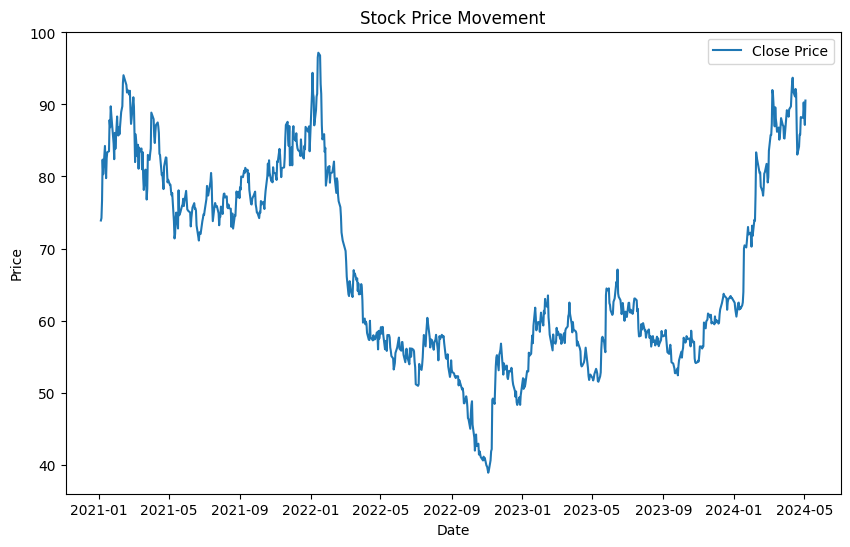

In [14]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize stock price movements 股價走勢圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.title('Stock Price Movement')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

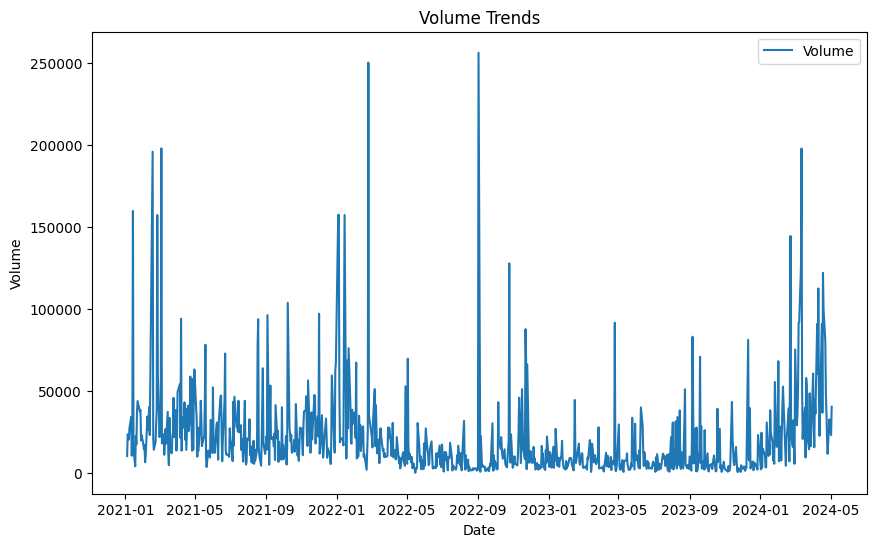

In [15]:
# Visualize volume trends 交易量變化圖
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volume'], label='Volume')
plt.title('Volume Trends')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [16]:
# Step 4: Feature Engineering
# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Drop rows with missing values (due to rolling means)
stock_data.dropna(inplace=True)

# Split data into features and target variable
X = stock_data.drop(['Close', 'Adj Close'], axis=1)  # Features (excluding Close and Adj Close)
y = stock_data['Close']  # Target variable

In [17]:
# Step 5: Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [18]:
# Step 6: Hyperparameter Tuning
# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Initialize Random Forest model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', min_samples_leaf=2, n_estimators=200,
                      random_state=42)

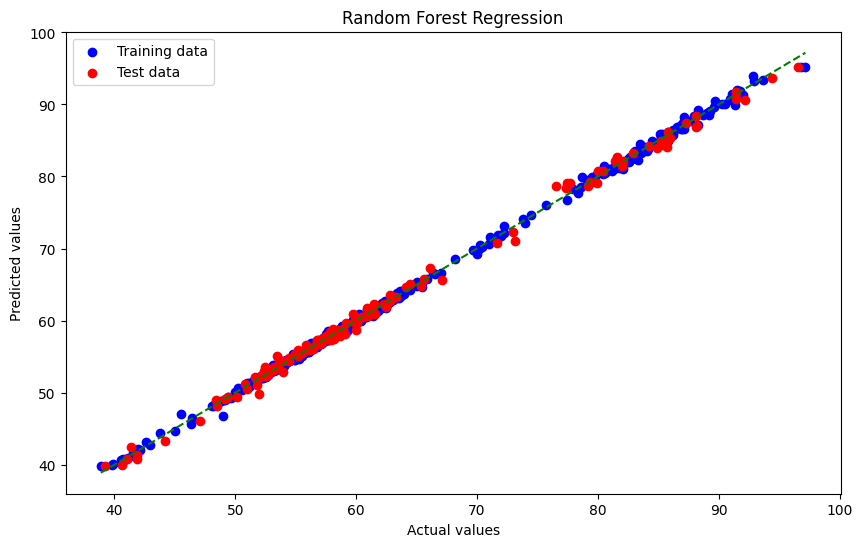

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Predictions on training set
y_train_pred = best_rf_model.predict(X_train)

# Predictions on test set
y_test_pred = best_rf_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted values for training set
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
# Plotting actual vs predicted values for test set
plt.scatter(y_test, y_test_pred, color='red', label='Test data')

# Plotting the diagonal line
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='green', linestyle='--')

plt.title('Random Forest Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


In [20]:
# Step 7: Model Evaluation
# Predict on test data
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5471133018891651


In [21]:
# MSE 的值越小，說明預測模型描述實驗資料具有更好的精確度

In [22]:
# Step 8: Prediction
# Example: Predicting stock price for the next day
latest_data = X.iloc[-1].values.reshape(1, -1)
predicted_price = best_rf_model.predict(latest_data)
print("Predicted Price for Next Day:", predicted_price[0])

Predicted Price for Next Day: 90.01515644155232


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [25]:
from scipy.stats import ttest_rel

# Apply hypothesis testing
t_stat, p_value = ttest_rel(y_test, y_pred)

# Define significance level
alpha = 0.05

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("T-test result: There is a significant difference between actual and predicted prices.")
else:
    print("T-test result: There is no significant difference between actual and predicted prices.")


T-statistic: 0.7887427539651363
P-value: 0.43174392388424243
T-test result: There is no significant difference between actual and predicted prices.


In [26]:
from scipy.stats import wilcoxon

# Apply Wilcoxon signed-rank test
statistic, p_value = wilcoxon(y_test, y_pred)

# Define significance level
alpha = 0.05

print("Wilcoxon Statistic:", statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Wilcoxon Test result: There is a significant difference between actual and predicted prices.")
else:
    print("Wilcoxon Test result: There is no significant difference between actual and predicted prices.")


Wilcoxon Statistic: 3821.0
P-value: 0.5587477653582841
Wilcoxon Test result: There is no significant difference between actual and predicted prices.
